In [1]:
import sys
sys.path.append('../../') # or just install the module

In [2]:
import numpy as np

N = 200
class_names = ['a', 'b', 'c']
y_true = np.random.randint(0, len(class_names), size=(N))
obj_ids = [f'obj{k}' for k in range(0, len(y_true))]
y_pred_p = np.random.uniform(0, 1, size=(N, len(class_names)))
y_pred_p = y_pred_p/np.sum(y_pred_p, axis=1)[...,None]
print('y_true', y_true, y_true.shape)
print('y_pred_p', y_pred_p.shape)

y_true [0 2 1 2 2 2 1 1 2 1 2 1 1 2 0 1 0 1 2 1 2 1 0 1 2 1 1 0 0 0 1 0 1 0 2 1 2
 1 0 2 1 1 1 1 0 1 1 2 0 2 1 2 0 0 2 1 1 2 0 0 0 0 0 2 2 2 2 2 1 0 1 1 2 2
 2 2 1 1 0 0 1 2 1 0 1 0 1 2 1 1 0 1 1 0 0 1 1 1 0 2 2 0 2 0 2 0 2 0 1 2 1
 0 2 1 2 1 2 1 2 0 2 0 1 2 1 2 0 2 0 1 1 0 2 0 0 2 2 0 0 2 2 1 0 1 2 0 2 2
 0 1 1 2 0 2 0 1 0 0 0 0 1 1 1 2 0 2 1 1 2 1 0 2 0 0 0 0 1 1 0 2 2 2 1 0 2
 1 2 0 0 2 0 1 0 2 2 0 0 2 2 2] (200,)
y_pred_p (200, 3)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(<Figure size 1200x1000 with 2 Axes>,
 array([[[0.27692308, 0.35384615, 0.36923077],
         [0.26865672, 0.44776119, 0.28358209],
         [0.30882353, 0.33823529, 0.35294118]]]))

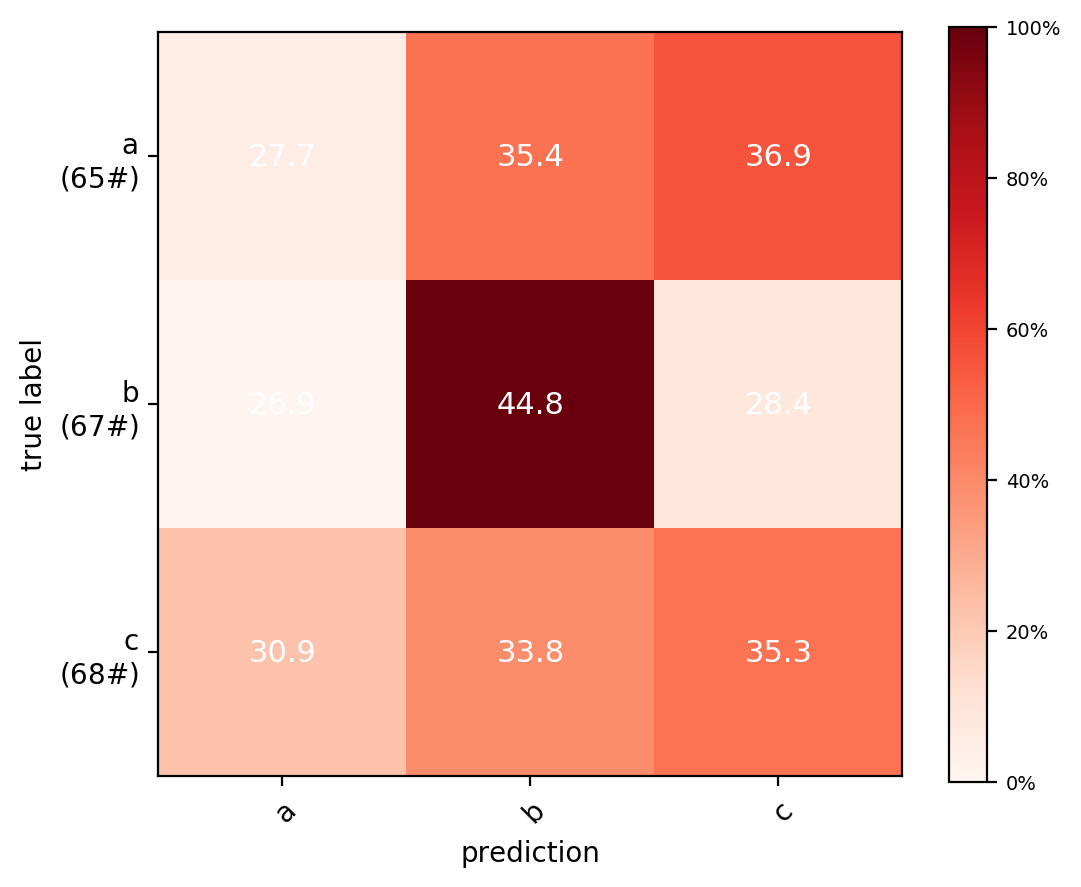

In [11]:
%load_ext autoreload
%autoreload 2
from fuzzytools.datascience import metrics
from fuzzytools.matplotlib.cm_plots import plot_custom_confusion_matrix

metrics_cdict, metrics_dict, cm = metrics.get_multiclass_metrics(y_pred_p, y_true, class_names)
title = ''
#title += f'b-f1score={f1score_xe}'+'\n'
#title += f'b-accuracy={accuracy_xe}%'+'\n'
cm_kwargs = {
    'title':title[:-1],
    'figsize':(6,5),
    'normalize_mode':None,
}
#fig, ax = plot_custom_confusion_matrix(cm[None], class_names, **cm_kwargs)
cm_kwargs = {
    'title':title[:-1],
    'figsize':(6,5),
    'normalize_mode':'true',
}
plot_custom_confusion_matrix(cm[None], class_names, **cm_kwargs)

In [ ]:
y_pred_p, y_target

In [ ]:
%load_ext autoreload
%autoreload 2
from fuzzytools.datascience import metrics as metrics
from fuzzytools.matplotlib.cm_plots import plot_custom_confusion_matrix

metrics_cdict, metrics_dict, cm = metrics.get_multiclass_metrics(y_pred_p, y_target, class_names)
print(metrics_cdict[class_names[0]].keys())
print(metrics_dict.keys())
{c:metrics_cdict[c]['recall'] for c in class_names}
for k in metrics_dict.keys():
    if 'w-' in k:
        continue
    print(k, metrics_dict[k])

In [ ]:
from sklearn import metrics as skmetrics

precision, recall, f1score,_ = skmetrics.precision_recall_fscore_support(y_target, y_pred_p.argmax(axis=-1),
                average=None,
                labels=range(0, len(class_names)),
                )
print(np.mean(precision))
print(np.mean(recall))
print(np.mean(f1score))

In [ ]:
precision, recall, score,_ = skmetrics.precision_recall_fscore_support(
    np.array([0, 0, 0 ,1 ,0 ,1, 0, 0 ,0, 1, 0, 0, 1, 0, 0, 1 ,0, 0 ,0 ,1]).astype(bool),
    np.array([0 ,0, 1, 0 ,0, 1 ,1 ,0, 0, 0, 0, 1, 0, 0, 0, 0, 0 ,0, 0 ,0]).astype(bool),
    average='binary', pos_label=1)
print(precision)

In [ ]:
import matplotlib.pyplot as plt

rocc = metrics_cdict['a']['rocc']
plt.plot(rocc['fpr'], rocc['tpr'])

In [ ]:
import matplotlib.pyplot as plt

rocc = metrics_cdict['a']['prc']
plt.plot(rocc['recall'], rocc['precision'])